### DecisionTree Implementation using `IRIS` dataset:(Its 3 class classifier)

-- https://www.durgasoftonline.com/s/courses/6683c272b9a6691bde2a2cec/take


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- With the above we got the all the columns : its required to findout the features and target variable 
- Target(y): species
- features (X): dont just take remaining columns except target... we have to follow some kind of check points. 
- We have to findout which features are important to use in features selection.

- Step 1: Visualize the dataset 

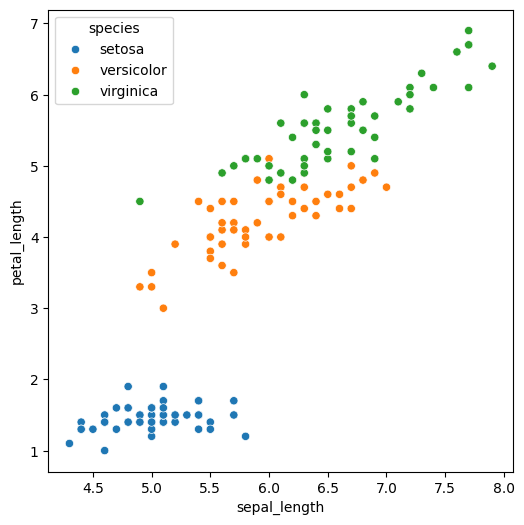

In [7]:
plt.figure(figsize=(6,6))

sns.scatterplot(data=iris,x='sepal_length', y='petal_length', hue='species')
plt.show()

- If you observe the above dataset , Its clealy separated setosa but we could see versicolor virginica combination. we have to check remaining features verification.

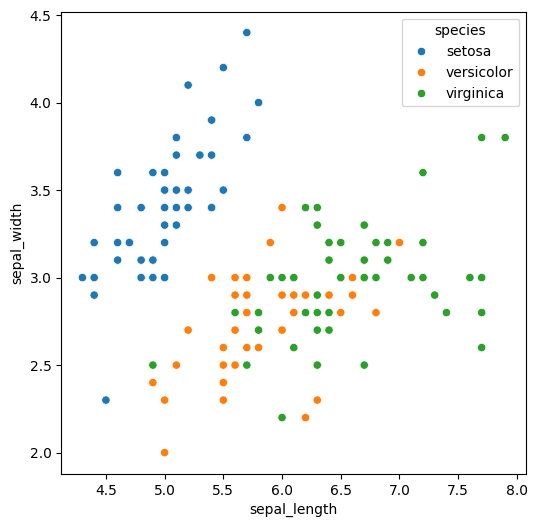

In [8]:
# sepal_length and sepal_width

plt.figure(figsize=(6,6))

sns.scatterplot(data=iris,x='sepal_length', y='sepal_width', hue='species')
plt.show()

- If you observe the above , samples data completly overlapping with the above combination.if tried with above combination it will create too many boundaries as well as too much complexity.

In [9]:
X=iris[['sepal_length', 'sepal_width']]
y=iris['species']

In [19]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=35)
X_train.shape, X_test.shape

((115, 2), (35, 2))

In [20]:
y_train.shape, y_test.shape

((115,), (35,))

#### Train the model

In [21]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7428571428571429

In [22]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7428571428571429

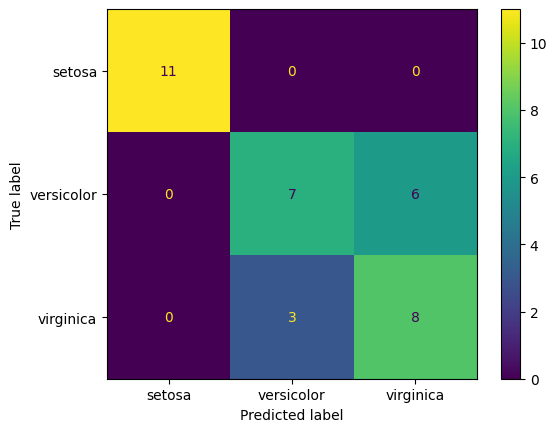

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

- This is 3 class classifier : setosa, versicolor and virginica.
- If you observe the above confusionmetrix , setosa got predicted everything got correct but when comes to the versicolor , out 13 samples its predicted 7 correct and remaining 6 wrong , same way verginica as well out 11 samples , its predicted 8 correct but 3 are samples are wrong.
- Testing accuracy as well not upto to the mark: 74%

#### Now we can compare the features between sepal_length and petal_width

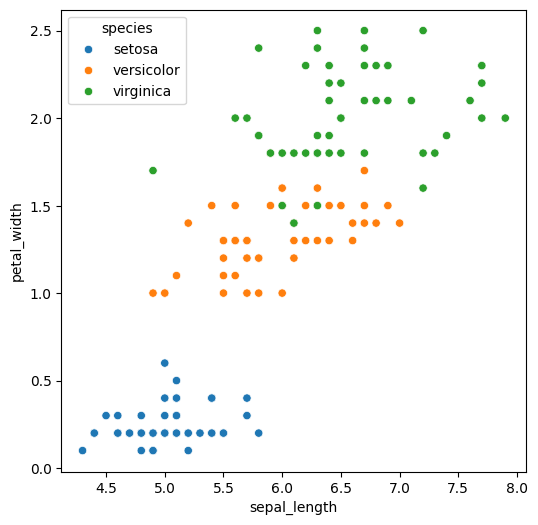

In [24]:
plt.figure(figsize=(6,6))

sns.scatterplot(data=iris,x='sepal_length', y='petal_width', hue='species')
plt.show()

- This looks to be good , we can easily separate with minimum boundaries.

In [25]:
X=iris[['sepal_length', 'petal_width']]
y=iris['species']

In [26]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=35)
X_train.shape, X_test.shape

((115, 2), (35, 2))

In [38]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8571428571428571

In [29]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.8571428571428571

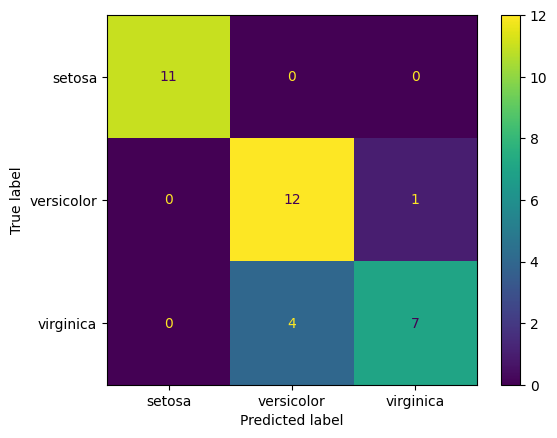

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

### Checking with petal_length and petal_width: This seems to best for feature selection 

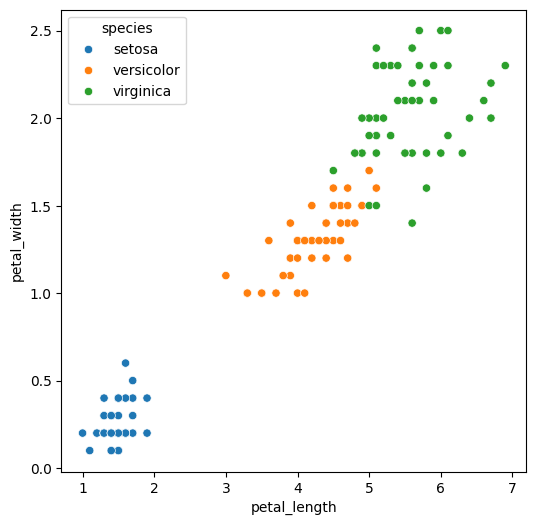

In [39]:
plt.figure(figsize=(6,6))

sns.scatterplot(data=iris,x='petal_length', y='petal_width', hue='species')
plt.show()

In [40]:
X=iris[['petal_length', 'petal_width']]
y=iris['species']

In [41]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=35)
X_train.shape, X_test.shape

((115, 2), (35, 2))

In [52]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9428571428571428

- Here we are getting maximum accuracy : 94% with `petal_length` and `petal_width`

In [53]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9428571428571428

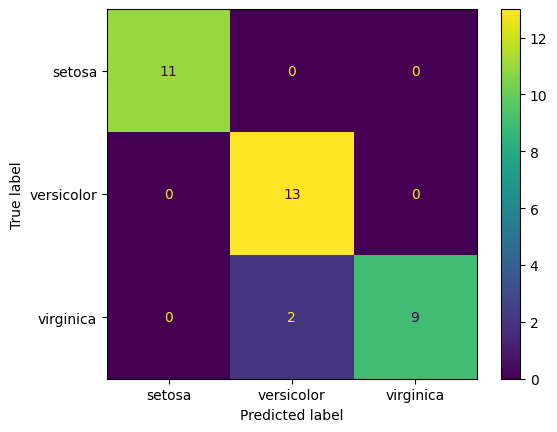

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

- All setosa are predicted correctly 
- All versicolors are predicted correctly.
- For virginica , 9 got predicted correctly outof 11 (only 2 went wrong)

In [55]:
model.get_depth(), model.get_n_leaves()

(3, np.int64(5))

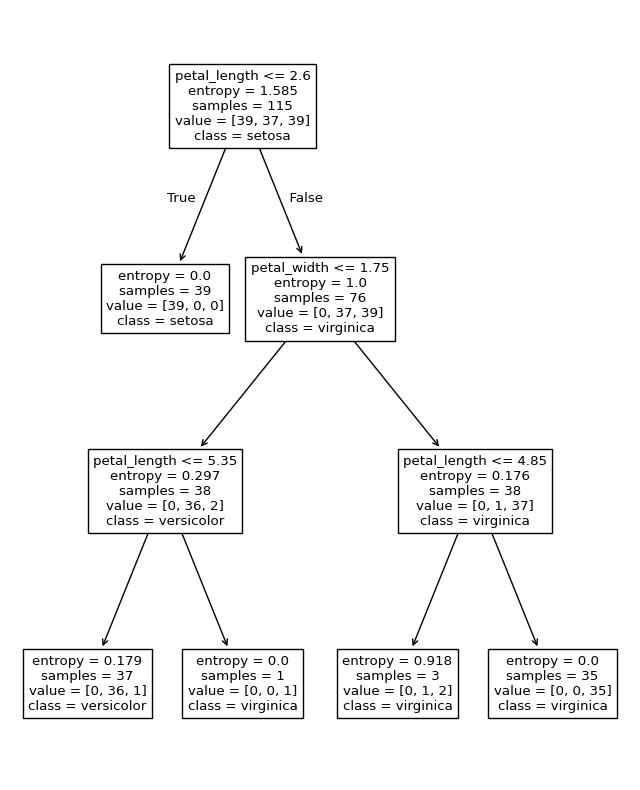

In [56]:
plt.figure(figsize=(8,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

### How do we know which featues required to select from the list of features : As of now we are using manually selecting and comparing:

- We can use the below command to compare between all the features:

<Figure size 600x800 with 0 Axes>

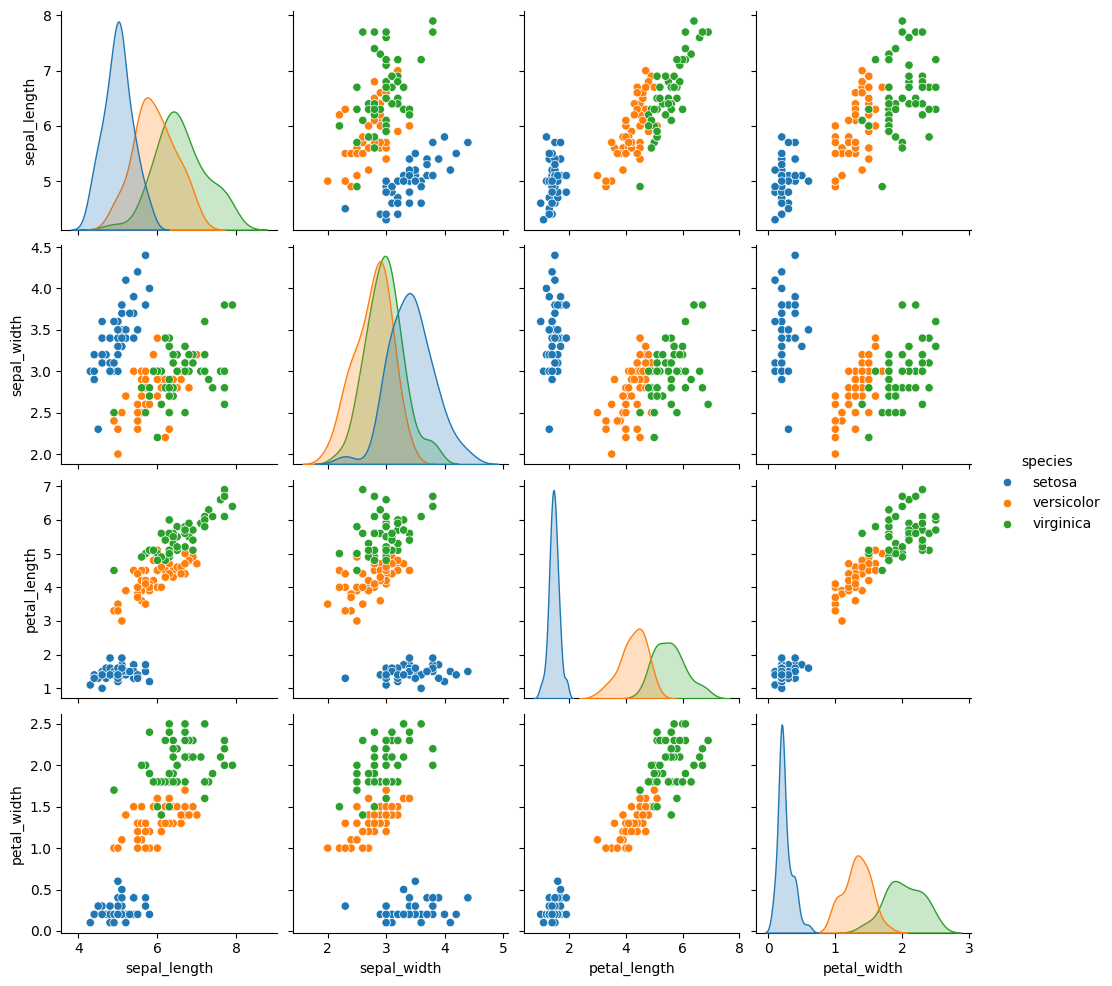

In [47]:
# we can use the seaborn library to get all the comparisions results:
plt.figure(figsize=(6,8))
sns.pairplot(data=iris, hue='species')
plt.show()

- With the above scatter plots , we can take sometime and decide which one will be good fit for features selections: